In [1]:
import samples
import sys
import util
import time
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
TRAINING_SET_SIZES_FACES = [45, 90, 135, 180, 225, 270, 315, 360, 405, 450]
TRAINING_SET_SIZES_DIGITS = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
TRAINING_TIME_FACES = np.ones((10, 10))
ACCURACY_FACES = np.ones((10, 10))
TRAINING_TIME_DIGITS = np.ones((10, 10))
ACCURACY_DIGITS = np.ones((10, 10))
TEST_SET_SIZE = 100
DIGIT_DATUM_WIDTH = 28
DIGIT_DATUM_HEIGHT = 28
FACE_DATUM_WIDTH = 60
FACE_DATUM_HEIGHT = 70

In [3]:
def basicFeatureExtractorDigit(datum):
    a = datum.getPixels()

    features = util.Counter()
    for x in range(DIGIT_DATUM_WIDTH):
        for y in range(DIGIT_DATUM_HEIGHT):
            if datum.getPixel(x, y) > 0:
                features[(x,y)] = 1
            else:
                features[(x,y)] = 0
    return features

In [4]:
def basicFeatureExtractorFace(datum):
    a = datum.getPixels()

    features = util.Counter()
    for x in range(FACE_DATUM_WIDTH):
        for y in range(FACE_DATUM_HEIGHT):
            if datum.getPixel(x, y) > 0:
                features[(x,y)] = 1
            else:
                features[(x,y)] = 0
    return features

In [5]:
def pullFaceData(trainingSize, testSize, FACE_DATUM_WIDTH, FACE_DATUM_HEIGHT):
    rawTrainingData, chosenList = samples.loadDataFile("facedata/facedatatrain.txt", trainingSize,FACE_DATUM_WIDTH,FACE_DATUM_HEIGHT,True)
    trainingLabels = samples.loadLabelsFile("facedata/facedatatrainlabels.txt", chosenList)
    rawTestData, chosenList = samples.loadDataFile("facedata/facedatatest.txt", testSize,FACE_DATUM_WIDTH,FACE_DATUM_HEIGHT)
    testLabels = samples.loadLabelsFile("facedata/facedatatestlabels.txt", chosenList)
    return rawTrainingData, trainingLabels, rawTestData, testLabels

In [6]:
def pullDigitData(trainingSize, testSize, DIGIT_DATUM_WIDTH, DIGIT_DATUM_HEIGHT):
    rawTrainingData, chosenList = samples.loadDataFile("digitdata/trainingimages.txt", trainingSize,DIGIT_DATUM_WIDTH,DIGIT_DATUM_HEIGHT,True)
    trainingLabels = samples.loadLabelsFile("digitdata/traininglabels.txt", chosenList)
    rawTestData, chosenList = samples.loadDataFile("digitdata/testimages.txt", testSize,DIGIT_DATUM_WIDTH,DIGIT_DATUM_HEIGHT)
    testLabels = samples.loadLabelsFile("digitdata/testlabels.txt", chosenList)
    return rawTrainingData, trainingLabels, rawTestData, testLabels

In [7]:
def trainingDataDF(trainingSize, DATUM_WIDTH, DATUM_HEIGHT, trainingData, trainingLabels):
    features = trainingData[0].keys()
    pictureSize = DATUM_WIDTH*DATUM_HEIGHT
    dfTrain = pd.DataFrame(index=range(trainingSize),columns=range(pictureSize))
    dfTrain.columns = list(features)[0:pictureSize]
    dfTrain['Label'] = pd.Series(trainingLabels)
    i = 0
    while i < trainingSize:
        data = trainingData[i].values()
        dataList = list(data)
        j = 0
        while j < pictureSize:
            dfTrain.iat[i, j] = dataList[j]
            j = j + 1
        i = i + 1
    return dfTrain

In [8]:
def testDataDF(testSize, DATUM_WIDTH, DATUM_HEIGHT, testData, testLabels):
    features = testData[0].keys()
    pictureSize = DATUM_WIDTH*DATUM_HEIGHT
    dfTest = pd.DataFrame(index=range(testSize),columns=range(pictureSize))
    dfTest.columns = list(features)[0:pictureSize]
    dfTest['Label'] = pd.Series(testLabels)
    i = 0
    while i < testSize:
        data = testData[i].values()
        dataList = list(data)
        j = 0
        while j < pictureSize:
            dfTest.iat[i, j] = dataList[j]
            j = j + 1
        i = i + 1
    return dfTest

In [9]:
def trainAndExecuteFaces(dfTrain, dfTest):
    df_X_train = dfTrain.iloc[:,:-1]
    df_Y_train = dfTrain.iloc[:,-1:]
    df_X_test = dfTest.iloc[:,:-1]
    df_Y_test = dfTest.iloc[:,-1:]
    logreg = LogisticRegression(solver = 'newton-cg')
    start_time = time.time()
    logreg.fit(df_X_train, df_Y_train.values.ravel())
    train_time = time.time() - start_time
    label_pred = logreg.predict(df_X_test)
    accuracy = metrics.accuracy_score(df_Y_test, label_pred)
    return accuracy, train_time

In [10]:
def trainAndExecuteDigits(dfTrain, dfTest):
    df_X_train = dfTrain.iloc[:,:-1]
    df_Y_train = dfTrain.iloc[:,-1:]
    df_X_test = dfTest.iloc[:,:-1]
    df_Y_test = dfTest.iloc[:,-1:]
    logreg = LogisticRegression(solver = 'newton-cg', multi_class = 'multinomial')
    start_time = time.time()
    logreg.fit(df_X_train, df_Y_train.values.ravel())
    train_time = time.time() - start_time
    label_pred = logreg.predict(df_X_test)
    accuracy = metrics.accuracy_score(df_Y_test, label_pred)
    return accuracy, train_time

In [11]:
i = 0
while i < 10:
    j = 0
    while j < 10:
        rawTrainingData, trainingLabels, rawTestData, testLabels = pullFaceData(TRAINING_SET_SIZES_FACES[i], TEST_SET_SIZE, FACE_DATUM_WIDTH, FACE_DATUM_HEIGHT)
        trainingData = list(map(basicFeatureExtractorFace, rawTrainingData))
        testData = list(map(basicFeatureExtractorFace, rawTestData))
        dfTrain = trainingDataDF(TRAINING_SET_SIZES_FACES[i], FACE_DATUM_WIDTH, FACE_DATUM_HEIGHT, trainingData, trainingLabels)
        dfTest = testDataDF(TEST_SET_SIZE, FACE_DATUM_WIDTH, FACE_DATUM_HEIGHT, testData, testLabels)
        accuracy, train_time = trainAndExecuteFaces(dfTrain, dfTest)
        ACCURACY_FACES[i, j] = accuracy
        TRAINING_TIME_FACES[i, j] = train_time
        j = j + 1
    i = i + 1

In [12]:
i = 0
while i < 10:
    j = 0
    while j < 10:
        rawTrainingData, trainingLabels, rawTestData, testLabels = pullDigitData(TRAINING_SET_SIZES_DIGITS[i], TEST_SET_SIZE, DIGIT_DATUM_WIDTH, DIGIT_DATUM_HEIGHT)
        trainingData = list(map(basicFeatureExtractorDigit, rawTrainingData))
        testData = list(map(basicFeatureExtractorDigit, rawTestData))
        dfTrain = trainingDataDF(TRAINING_SET_SIZES_DIGITS[i], DIGIT_DATUM_WIDTH, DIGIT_DATUM_HEIGHT, trainingData, trainingLabels)
        dfTest = testDataDF(TEST_SET_SIZE, DIGIT_DATUM_WIDTH, DIGIT_DATUM_HEIGHT, testData, testLabels)
        accuracy, train_time = trainAndExecuteDigits(dfTrain, dfTest)
        ACCURACY_DIGITS[i, j] = accuracy
        TRAINING_TIME_DIGITS[i, j] = train_time
        j = j + 1
    i = i + 1

In [14]:
np.savetxt("LogReg_Faces_Accuracy.csv", ACCURACY_FACES, delimiter = ",")
np.savetxt("LogReg_Faces_Time.csv", TRAINING_TIME_FACES, delimiter = ",")
np.savetxt("LogReg_Digits_Accuracy.csv", ACCURACY_DIGITS, delimiter = ",")
np.savetxt("LogReg_Digits_Time.csv", TRAINING_TIME_DIGITS, delimiter = ",")

In [15]:
samples = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'] 

In [16]:
face_accuracy_means_raw = np.mean(ACCURACY_FACES, axis = 1)
face_accuracy_means = [i * 100 for i in face_accuracy_means_raw]
face_accuracy_std = np.std(ACCURACY_FACES, axis = 1)
face_time_means = np.mean(TRAINING_TIME_FACES, axis = 1)
face_time_std = np.std(TRAINING_TIME_FACES, axis = 1)

In [17]:
digit_accuracy_means_raw = np.mean(ACCURACY_DIGITS, axis = 1)
digit_accuracy_means = [i * 100 for i in digit_accuracy_means_raw]
digit_accuracy_std = np.std(ACCURACY_DIGITS, axis = 1)
digit_time_means = np.mean(TRAINING_TIME_DIGITS, axis = 1)
digit_time_std = np.std(TRAINING_TIME_DIGITS, axis = 1)

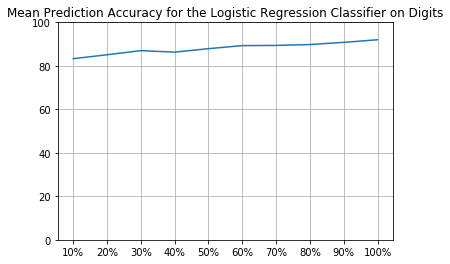

In [18]:
plt.plot(samples, digit_accuracy_means)
plt.title("Mean Prediction Accuracy for the Logistic Regression Classifier on Digits")
plt.ylim([0, 100])
plt.grid()
plt.savefig('mean_digits_acc_logreg.png')

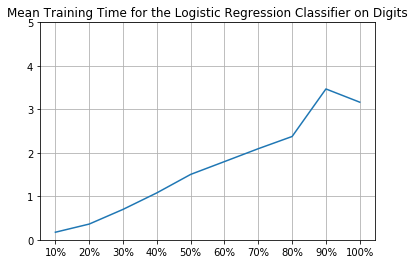

In [20]:
plt.plot(samples, digit_time_means)
plt.title("Mean Training Time for the Logistic Regression Classifier on Digits")
plt.ylim([0, 5])
plt.grid()
plt.savefig('mean_digits_time_logreg.png')

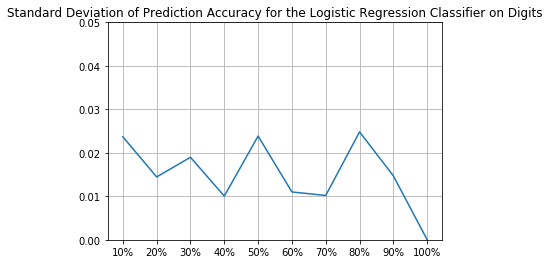

In [21]:
plt.plot(samples, digit_accuracy_std)
plt.title("Standard Deviation of Prediction Accuracy for the Logistic Regression Classifier on Digits")
plt.ylim([0, 0.05])
plt.grid()
plt.savefig('std_digits_acc_logreg.png')

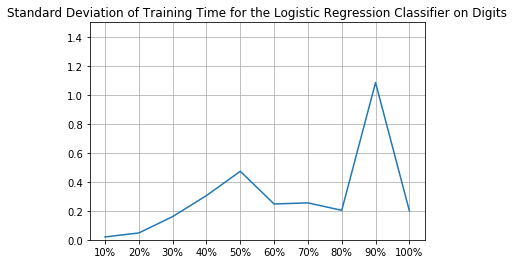

In [25]:
plt.plot(samples, digit_time_std)
plt.title("Standard Deviation of Training Time for the Logistic Regression Classifier on Digits")
plt.ylim([0, 1.5])
plt.grid()
plt.savefig('std_digits_time_logreg.png')

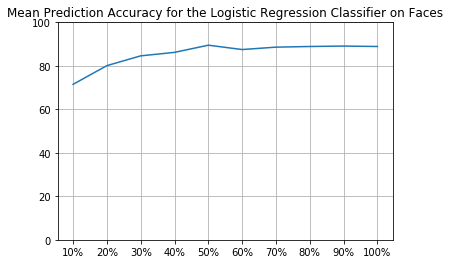

In [26]:
plt.plot(samples, face_accuracy_means)
plt.title("Mean Prediction Accuracy for the Logistic Regression Classifier on Faces")
plt.ylim([0, 100])
plt.grid()
plt.savefig('mean_faces_acc_logreg.png')

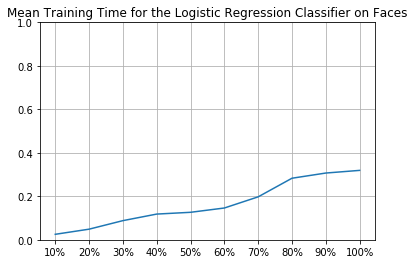

In [27]:
plt.plot(samples, face_time_means)
plt.title("Mean Training Time for the Logistic Regression Classifier on Faces")
plt.ylim([0, 1])
plt.grid()
plt.savefig('mean_faces_time_logreg.png')

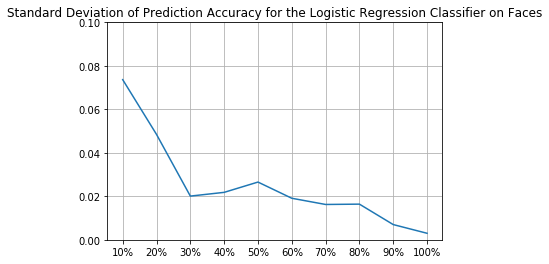

In [28]:
plt.plot(samples, face_accuracy_std)
plt.title("Standard Deviation of Prediction Accuracy for the Logistic Regression Classifier on Faces")
plt.ylim([0, 0.1])
plt.grid()
plt.savefig('std_faces_acc_logreg.png')

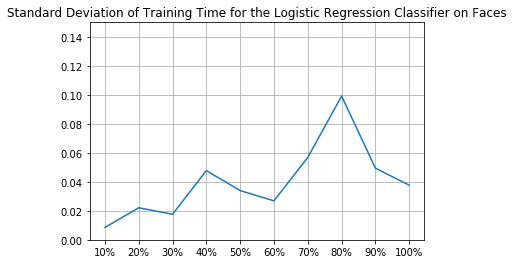

In [30]:
plt.plot(samples, face_time_std)
plt.title("Standard Deviation of Training Time for the Logistic Regression Classifier on Faces")
plt.ylim([0, 0.15])
plt.grid()
plt.savefig('std_faces_time_logreg.png')